# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [91]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()
        
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | westport
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | tazacorte
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | wailua homesteads
Processing Record 12 of Set 1 | fale old settlement
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | luba
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | walvis bay
Processing Record 17 of Set 1 | san antonio de pale
Processing Record 18 of Set 1 | tralee
Processing Record 19 of Set 1 | holualoa
Processing Record 20 of Set 1 | alpena
Processing Record 21 of Set 1 | stanley
Processing Record 22 o

In [92]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(data= city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [93]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,westport,41.1415,-73.3579,9.95,38,0,0.89,US,1731193277
1,grytviken,-54.2811,-36.5092,-4.63,73,11,4.63,GS,1731192876
2,adamstown,-25.0660,-130.1015,23.16,88,99,9.42,PN,1731193449
3,waitangi,-43.9535,-176.5597,12.95,92,96,4.55,NZ,1731192857
4,punta arenas,-53.1500,-70.9167,7.06,87,75,4.12,CL,1731192957


In [94]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [95]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,westport,41.1415,-73.3579,9.95,38,0,0.89,US,1731193277
1,grytviken,-54.2811,-36.5092,-4.63,73,11,4.63,GS,1731192876
2,adamstown,-25.0660,-130.1015,23.16,88,99,9.42,PN,1731193449
3,waitangi,-43.9535,-176.5597,12.95,92,96,4.55,NZ,1731192857
4,punta arenas,-53.1500,-70.9167,7.06,87,75,4.12,CL,1731192957


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

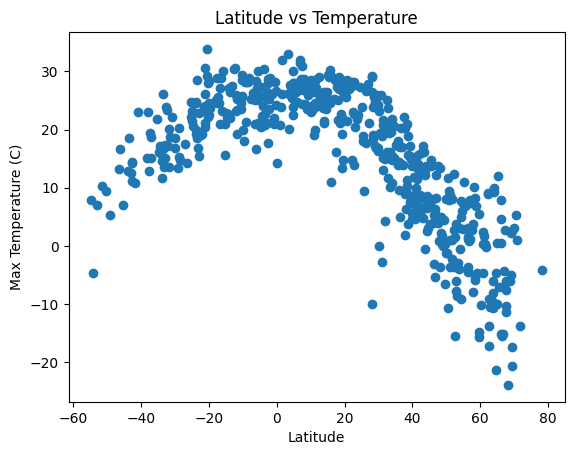

In [96]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'Latitude vs Temperature')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

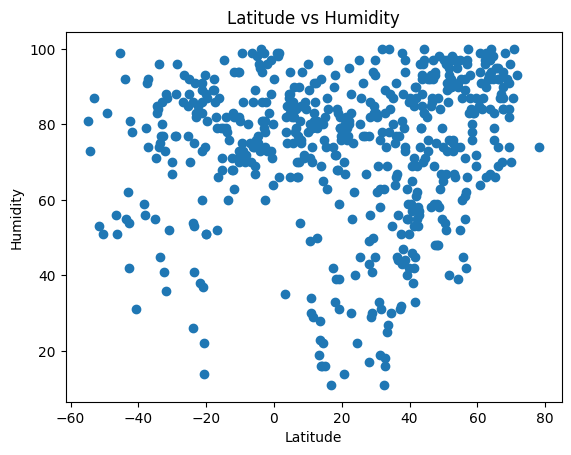

In [97]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Latitude vs Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

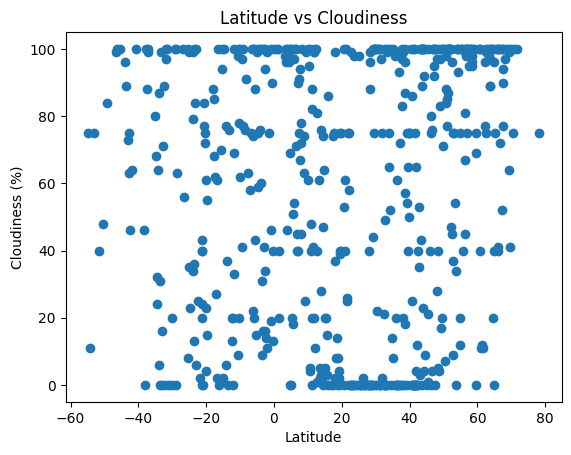

In [98]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Latitude vs Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

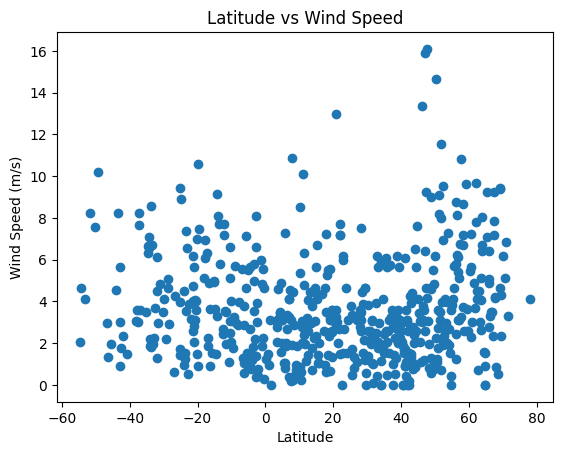

In [99]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f'Latitude vs Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [100]:
# Define a function to create Linear Regression plots
def line_eq(data,x,y):
    x_values = data[x]
    y_values = data[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    plt.title(f'{x} vs {y}')

In [101]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,westport,41.1415,-73.3579,9.95,38,0,0.89,US,1731193277
6,tazacorte,28.6290,-17.9293,25.64,29,0,4.47,ES,1731193454
7,college,64.8569,-147.8028,-10.01,79,40,0.00,US,1731192673
9,wailua homesteads,22.0669,-159.3780,27.44,80,0,7.72,US,1731192901
12,luba,3.4568,8.5547,26.35,82,100,2.76,GQ,1731193461


In [102]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,-4.63,73,11,4.63,GS,1731192876
2,adamstown,-25.0660,-130.1015,23.16,88,99,9.42,PN,1731193449
3,waitangi,-43.9535,-176.5597,12.95,92,96,4.55,NZ,1731192857
4,punta arenas,-53.1500,-70.9167,7.06,87,75,4.12,CL,1731192957
5,ancud,-41.8697,-73.8203,10.72,78,64,2.33,CL,1731193205


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7498369350412382


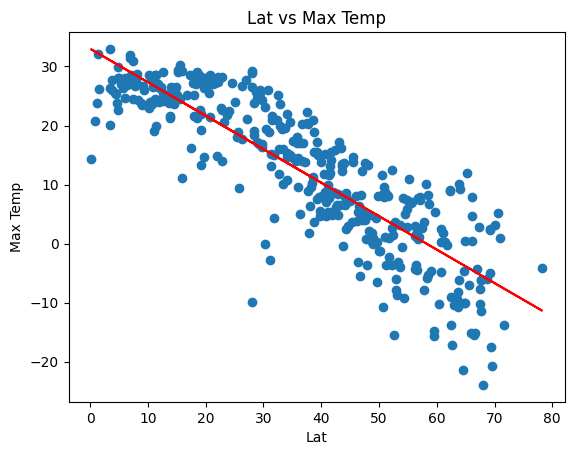

In [103]:
# Linear regression on Northern Hemisphere
line_eq(northern_hemi_df,'Lat','Max Temp')

The r-squared is: 0.5084203831123696


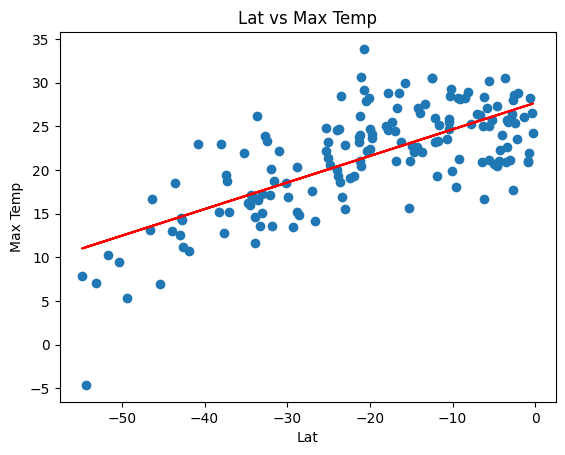

In [104]:
# Linear regression on Southern Hemisphere
line_eq(southern_hemi_df,'Lat','Max Temp')


**Discussion about the linear relationship:** Max temp decreases the further away from zero. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.04357608052976647


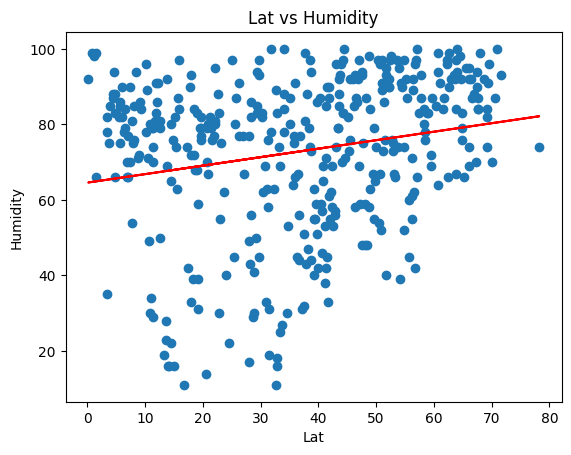

In [105]:
# Northern Hemisphere
line_eq(northern_hemi_df,'Lat','Humidity')


The r-squared is: 0.059793397972812995


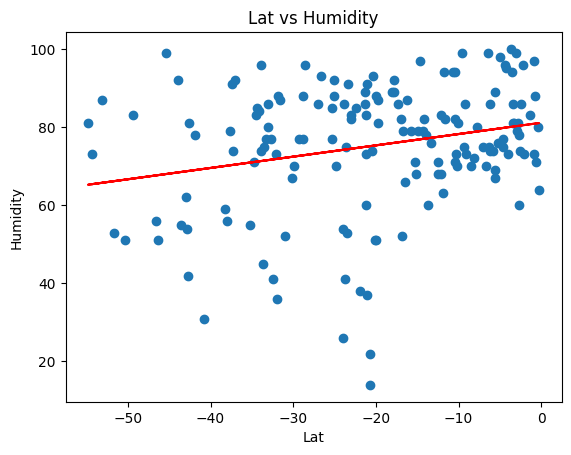

In [106]:
# Southern Hemisphere
line_eq(southern_hemi_df,'Lat','Humidity')


**Discussion about the linear relationship:** No real relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05705421196475324


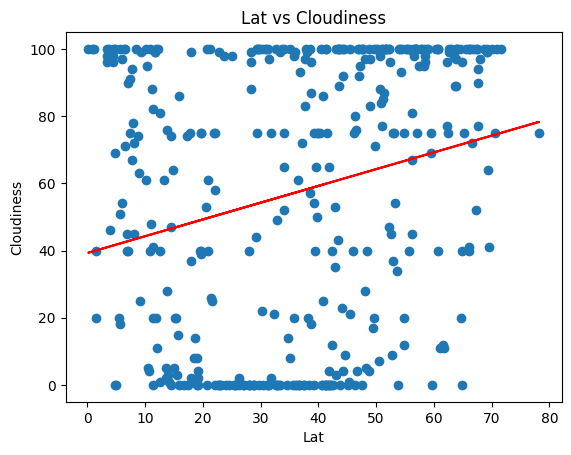

In [107]:
# Northern Hemisphere
line_eq(northern_hemi_df,'Lat','Cloudiness')

The r-squared is: 0.0012301032344022031


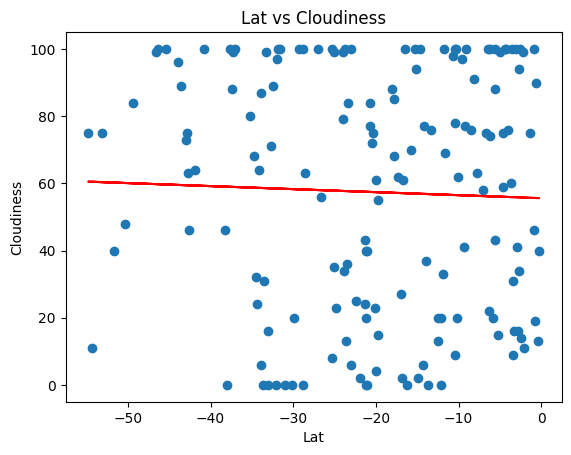

In [108]:
# Southern Hemisphere
line_eq(southern_hemi_df,'Lat','Cloudiness')

**Discussion about the linear relationship:** Even less relation between points

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.05610658209824322


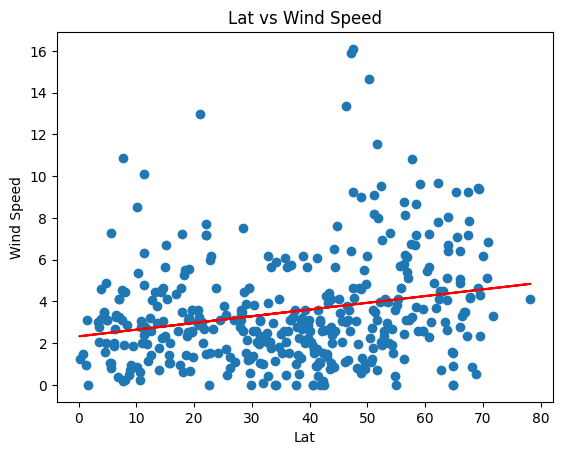

In [109]:
# Northern Hemisphere
line_eq(northern_hemi_df,'Lat','Wind Speed')

The r-squared is: 0.026222020823209173


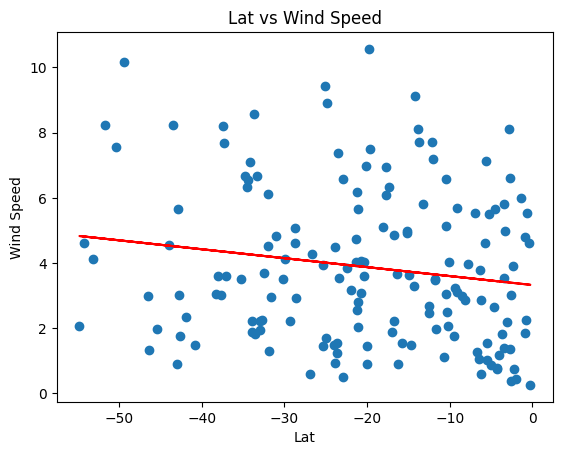

In [110]:
# Southern Hemisphere
line_eq(southern_hemi_df,'Lat','Wind Speed')

**Discussion about the linear relationship:** In the Northern Hemisphere the further away fr